In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
metadata = pd.read_csv("~/Desktop/hmp2_metadata.csv")
fecalcal_info = metadata.loc[metadata.data_type == "metatranscriptomics", ["External ID", "Participant ID", "diagnosis", "visit_num", "fecalcal", "fecalcal_ng_ml"]]
fecalcal_info = fecalcal_info[~fecalcal_info["External ID"].str.contains("_P")]
fecalcal_info = fecalcal_info[~fecalcal_info["External ID"].str.contains("_TR")]
# print( fecalcal_info.drop(fecalcal_info[fecalcal_info["External ID"].str.contains('_P')]))
fc1 = [not math.isnan(x) for x in fecalcal_info.fecalcal]
fc2 = [not math.isnan(x) for x in fecalcal_info.fecalcal_ng_ml]
fc = [fc1[i] or fc2[i] for i in range(len(fc1))]
fecalcal_info = fecalcal_info.loc[fc, :]
fc1 = [not math.isnan(x) for x in fecalcal_info.fecalcal]
fc2 = [not math.isnan(x) for x in fecalcal_info.fecalcal_ng_ml]
fecalcal_info.fecalcal = fecalcal_info.fecalcal.fillna(fecalcal_info['fecalcal_ng_ml'])
fecalcal_info.drop(["fecalcal_ng_ml"], inplace=True, axis=1)
diagnosis = fecalcal_info.loc[:, ["Participant ID", "diagnosis"]].drop_duplicates()
diagnosis["External ID"] = fecalcal_info["External ID"]
diagnosis.set_index(["Participant ID"], inplace=True)
diagnosis

In [ ]:
selected_samples = fecalcal_info.groupby(["Participant ID"]).agg({"fecalcal": [max]})
selected_samples["diagnosis"] = diagnosis.diagnosis
selected_samples["External ID"] = diagnosis["External ID"]
selected_samples.columns = ["fecalcal_max", "Diagnosis", "External ID"]
selected_samples.set_index("External ID")
selected_samples.to_csv("~/Desktop/selected_samples_MTX.csv")
# selected_samples

In [ ]:
plt.style.use('seaborn-deep')
plt.hist([selected_samples.loc[selected_samples.Diagnosis=="nonIBD", :].fecalcal_max, selected_samples.loc[selected_samples.Diagnosis=="CD", :].fecalcal_max, selected_samples.loc[selected_samples.Diagnosis=="UC", :].fecalcal_max], label=["nonIBD", "CD", "UC"])
plt.legend()

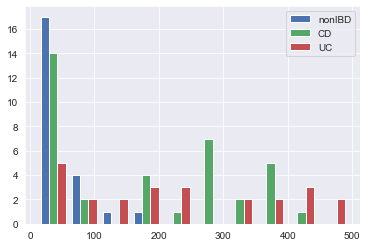

In [6]:
plt.style.use('seaborn-deep')
plt.hist([selected_samples.loc[selected_samples.Diagnosis=="nonIBD", :].fecalcal_max, selected_samples.loc[selected_samples.Diagnosis=="CD", :].fecalcal_max, selected_samples.loc[selected_samples.Diagnosis=="UC", :].fecalcal_max], label=["nonIBD", "CD", "UC"])
plt.legend()